# Name : Vikas Choudhary - Roll No: 04  - UID : 20MBD004

About Data-Set :- World Health Organization has estimated 12 million deaths occur worldwide, Every year due to Heart diseases.

The summary of this notebook:

Data cleaning.

Exploratory Analysis

1.Which gender has more risk of coronary heart disease CHD.

2.Which age group has more smokers.

3.Relation between cigsPerDay and risk of coronary heart disease.

4.Relation between sysBP and risk of CHD.

5.Relation between diaBP and risk of CHD.

Predicting the risk of CHD with Logistic Regression.(85% accuracy)

Predicting the risk of CHD with Linear Regression.(0.08% accuracy)

Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("Heart-Dataset.csv")


• Gender: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)


• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Data Cleaning

In [7]:
df = df.rename(columns = {'male':'Gender','age':'Age','education':'Education','currentSmoker':'Current_Smoker','cigsPerDay':'Ciggs_Per_Day','BPMeds':'BP_Meds','prevalentStroke':'Prevalent_Stroke','prevalentHyp':'Prevalent_Hyp','diabetes':'Diabetes','totChol':'Tot_Chol','sysBP':'Sys_BP','diaBP':'Dia_BP','heartRate':'Heart_Rate','glucose':'Glucose','TenYearCHD':'TenYearCHD'})

In [8]:
df.head()

,Gender,Age,Education,Current_Smoker,Ciggs_Per_Day,BP_Meds,Prevalent_Stroke,Prevalent_Hyp,Diabetes,Tot_Chol,Sys_BP,Dia_BP,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.shape

(4238, 16)

In [10]:
df.dtypes

Gender                int64
Age                   int64
Education           float64
Current_Smoker        int64
Ciggs_Per_Day       float64
BP_Meds             float64
Prevalent_Stroke      int64
Prevalent_Hyp         int64
Diabetes              int64
Tot_Chol            float64
Sys_BP              float64
Dia_BP              float64
BMI                 float64
Heart_Rate          float64
Glucose             float64
TenYearCHD            int64
dtype: object

In [11]:
df.nunique()

Gender                 2
Age                   39
Education              4
Current_Smoker         2
Ciggs_Per_Day         33
BP_Meds                2
Prevalent_Stroke       2
Prevalent_Hyp          2
Diabetes               2
Tot_Chol             248
Sys_BP               234
Dia_BP               146
BMI                 1363
Heart_Rate            73
Glucose              143
TenYearCHD             2
dtype: int64

In [12]:
print(df.shape)

(4238, 16)


In [13]:
df.columns

Index(['Gender', 'Age', 'Education', 'Current_Smoker', 'Ciggs_Per_Day',
       'BP_Meds', 'Prevalent_Stroke', 'Prevalent_Hyp', 'Diabetes', 'Tot_Chol',
       'Sys_BP', 'Dia_BP', 'BMI', 'Heart_Rate', 'Glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            4238 non-null   int64  
 1   Age               4238 non-null   int64  
 2   Education         4133 non-null   float64
 3   Current_Smoker    4238 non-null   int64  
 4   Ciggs_Per_Day     4209 non-null   float64
 5   BP_Meds           4185 non-null   float64
 6   Prevalent_Stroke  4238 non-null   int64  
 7   Prevalent_Hyp     4238 non-null   int64  
 8   Diabetes          4238 non-null   int64  
 9   Tot_Chol          4188 non-null   float64
 10  Sys_BP            4238 non-null   float64
 11  Dia_BP            4238 non-null   float64
 12  BMI               4219 non-null   float64
 13  Heart_Rate        4237 non-null   float64
 14  Glucose           3850 non-null   float64
 15  TenYearCHD        4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.

In [15]:
df.isna().sum()

Gender                0
Age                   0
Education           105
Current_Smoker        0
Ciggs_Per_Day        29
BP_Meds              53
Prevalent_Stroke      0
Prevalent_Hyp         0
Diabetes              0
Tot_Chol             50
Sys_BP                0
Dia_BP                0
BMI                  19
Heart_Rate            1
Glucose             388
TenYearCHD            0
dtype: int64

In [16]:
#filling missing values
df.Ciggs_Per_Day = df.Ciggs_Per_Day.fillna(np.mean(df.Ciggs_Per_Day))
df.Tot_Chol = df.Tot_Chol.fillna(np.mean(df.Tot_Chol))
df.BMI = df.BMI.fillna(np.mean(df.BMI))
df.Heart_Rate = df.Heart_Rate.fillna(np.mean(df.Heart_Rate))
df.Glucose = df.Glucose.fillna(np.mean(df.Glucose))

In [17]:
df.isna().sum()

Gender                0
Age                   0
Education           105
Current_Smoker        0
Ciggs_Per_Day         0
BP_Meds              53
Prevalent_Stroke      0
Prevalent_Hyp         0
Diabetes              0
Tot_Chol              0
Sys_BP                0
Dia_BP                0
BMI                   0
Heart_Rate            0
Glucose               0
TenYearCHD            0
dtype: int64

# Exploratory Analysis

In [18]:
# Checking for which gender has more risk of coronary heart disease CHD
graph= df.groupby("Gender", as_index=False).TenYearCHD.sum()
graph



,Gender,TenYearCHD
0,0,301
1,1,343


Text(0, 0.5, 'TenYearCHD')

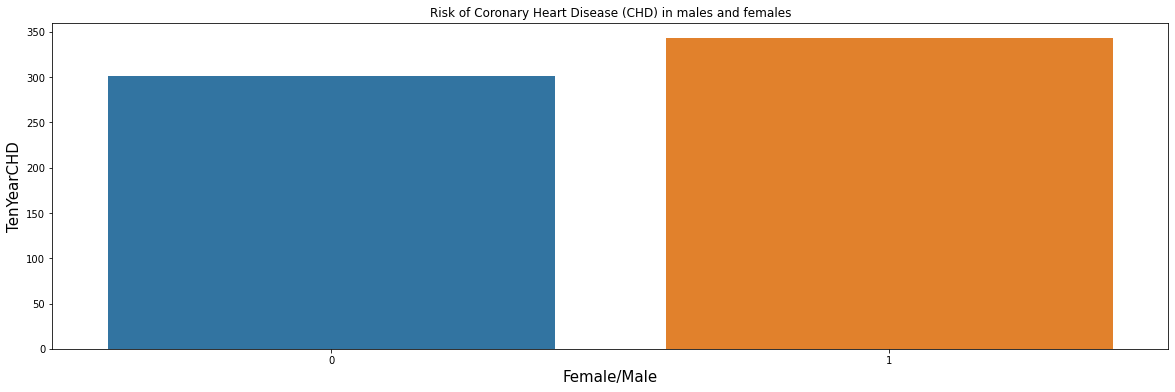

In [19]:
plt.figure(figsize=(20,6))
sns.barplot(x=graph['Gender'], y= graph['TenYearCHD'])
plt.title('Risk of Coronary Heart Disease (CHD) in males and females')
plt.xlabel('Female/Male', size =15)
plt.ylabel('TenYearCHD', size=15)

According to this dataset, males have slighly higher risk of coronary heart disease CHD.

In [20]:
#Checking for which age group has more risk of coronary heart disease CHD
graph1= df.groupby("Age",as_index=False).Current_Smoker.sum()
graph1

,Age,Current_Smoker
0,32,1
1,33,2
2,34,11
3,35,23
4,36,47
5,37,56
6,38,88
7,39,98
8,40,121
9,41,102


Text(0, 0.5, 'Total Smokers')

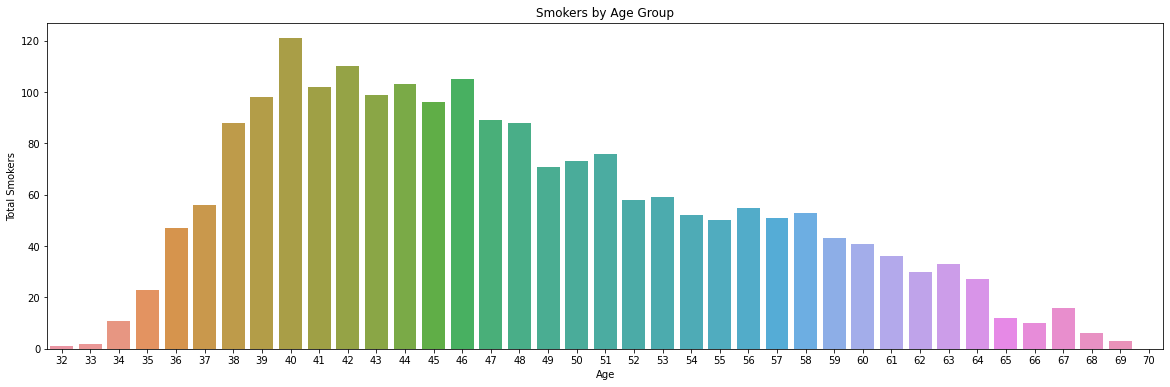

In [21]:
plt.figure(figsize=(20,6))
sns.barplot(x=graph1['Age'], y= graph1['Current_Smoker'])
plt.title('Smokers by Age Group')
plt.xlabel('Age')
plt.ylabel('Total Smokers')


Mid-age groups have more smokers and age group of 40 has the highest 121 somkers while the lowest smoker are of 70 age group with 0 smoker.


In [22]:
graph_2 = df.groupby("TenYearCHD", as_index=False).Ciggs_Per_Day.mean()
graph_2

,TenYearCHD,Ciggs_Per_Day
0,0,8.712600
1,1,10.624233


Text(0, 0.5, 'Ciggs_Per_Day')

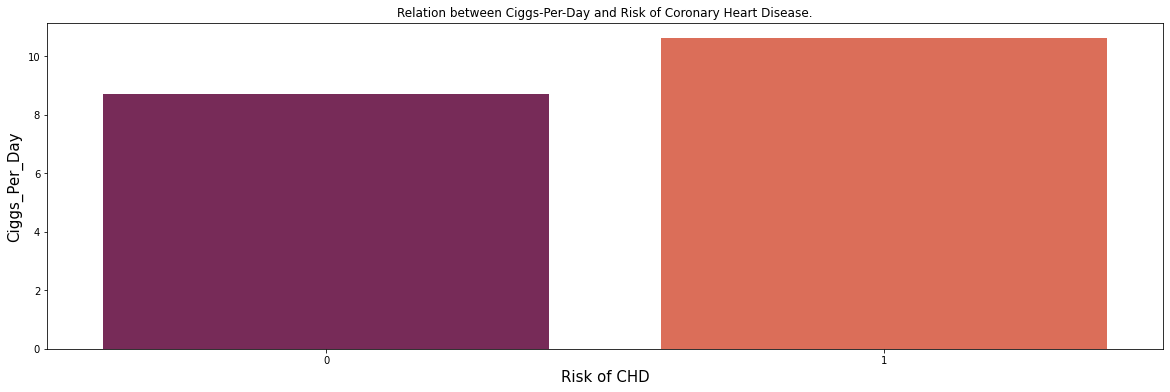

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x=graph_2["TenYearCHD"], y=graph_2["Ciggs_Per_Day"],palette="rocket")
plt.title("Relation between Ciggs-Per-Day and Risk of Coronary Heart Disease.")
plt.xlabel("Risk of CHD", size=15)
plt.ylabel("Ciggs_Per_Day", size=15)

High Ciggs_Per_Day comes with higher risk of CHD.


In [24]:
# Grouping up the data and ploting it

graph_3 = df.groupby("TenYearCHD", as_index=False).Sys_BP.mean()
graph_3

,TenYearCHD,Sys_BP
0,0,130.333612
1,1,143.618789


Text(0, 0.5, 'Sys_BP')

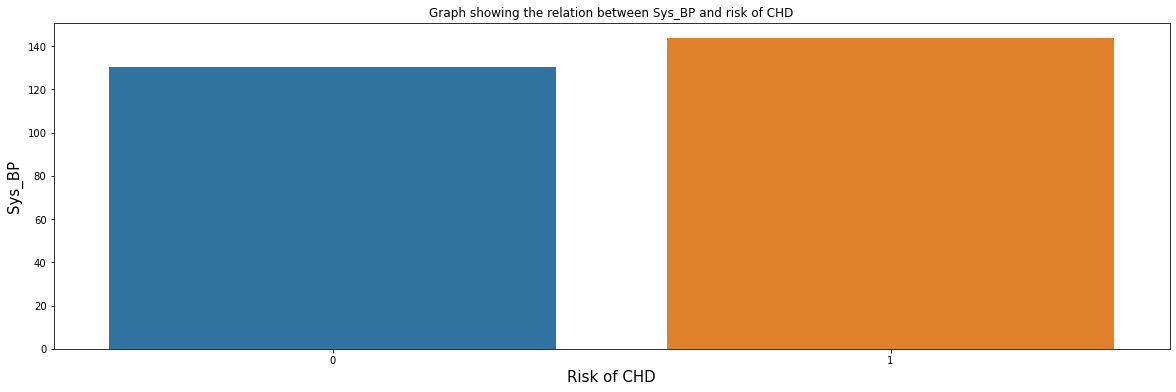

In [25]:
plt.figure(figsize=(20,6))
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["Sys_BP"])
plt.title("Graph showing the relation between Sys_BP and risk of CHD")
plt.xlabel("Risk of CHD", size=15)
plt.ylabel("Sys_BP", size=15)

Minor relation found between higher risk with higher Sys_BP

In [26]:
# Grouping up the data and ploting it

graph_4 = df.groupby("TenYearCHD", as_index=False).Dia_BP.mean()
graph_4

,TenYearCHD,Dia_BP
0,0,82.160963
1,1,86.981366


Text(0, 0.5, 'Dia_BP')

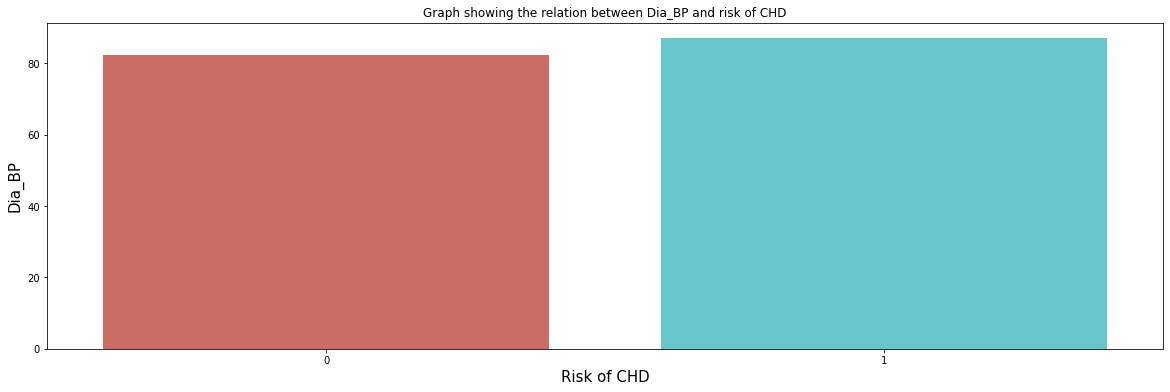

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["Dia_BP"], palette="hls")
plt.title("Graph showing the relation between Dia_BP and risk of CHD")
plt.xlabel("Risk of CHD", size=15)
plt.ylabel("Dia_BP", size=15)

Minor relation found between higher risk with higher Dia_BP.

In [28]:
# Drop unused columns
df.drop(["Current_Smoker", "Prevalent_Stroke", "Prevalent_Hyp", "Diabetes", "BP_Meds", "Education"],axis=1,inplace=True)

In [29]:
df.isna().sum()

Gender           0
Age              0
Ciggs_Per_Day    0
Tot_Chol         0
Sys_BP           0
Dia_BP           0
BMI              0
Heart_Rate       0
Glucose          0
TenYearCHD       0
dtype: int64

In [30]:
df.head()

,Gender,Age,Ciggs_Per_Day,Tot_Chol,Sys_BP,Dia_BP,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
df.describe()

,Gender,Age,Ciggs_Per_Day,Tot_Chol,Sys_BP,Dia_BP,BMI,Heart_Rate,Glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,11.879230,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,20.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Logistic Regression

In [32]:
X=df.drop(columns='TenYearCHD')
y=df['TenYearCHD']

In [33]:
y.dtypes

dtype('int64')

In [34]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
Logistic_R=LogisticRegression(random_state=3, max_iter=1000)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
#fitting the model
Logistic_R.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=3)

In [39]:
y_pred = Logistic_R.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(Logistic_R.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [41]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_pred)
print(Confusion_Matrix)

[[1066    7]
 [ 187   12]]


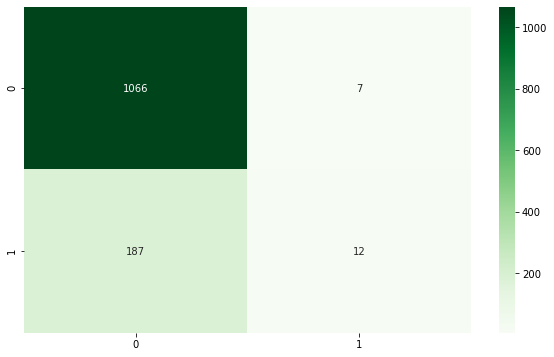

In [42]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(Confusion_Matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1073
           1       0.63      0.06      0.11       199

    accuracy                           0.85      1272
   macro avg       0.74      0.53      0.51      1272
weighted avg       0.82      0.85      0.79      1272



# Linear Regression

In [44]:
X=df.drop(columns='TenYearCHD')
y=df['TenYearCHD']

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
Linear_R=LinearRegression()

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
#fitting the model
Linear_R.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = Linear_R.predict(X_test)
y_pred


array([0.22207857, 0.30414406, 0.15532143, ..., 0.12781641, 0.23134343,
       0.25088277])

In [50]:
print('Accuracy of linear regression classifier on test set: {:.2f}'
      .format(Linear_R.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.08


# Conclusion : 

As we can see that we are getting Accuracy of logistic regression classifier on test set: 85% , Accuracy of linear regression classifier on test set: 8%, We can say that Logistic regression is best fit Model for our dataset.